In [1]:
import numpy as np
import pandas as pd

In [2]:
# load the data
train_data = pd.read_csv('fashionmnist/fashion-mnist_train.csv')
test_data = pd.read_csv('fashionmnist/fashion-mnist_test.csv')

In [3]:
# check the shape of the training data
train_data.shape

(60000, 785)

In [4]:
# check the shape of the test data
test_data.shape

(10000, 785)

In [5]:
# prepare the image data
# convnets take input tensors of shape (image_height, image_width, image_channels)
# we want these images to have size (28, 28, 1)
train_images = np.array(train_data.iloc[:,1:])
train_images = train_images.reshape((60000, 28,  28, 1))
train_images = train_images.astype('float32') / 255

test_images = np.array(test_data.iloc[:,1:])
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [6]:
# prepare the labels
from keras.utils import to_categorical

train_labels = to_categorical(np.array(train_data.iloc[:,0]))
test_labels = to_categorical(np.array(test_data.iloc[:,0]))

/Users/katrinasperry/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/katrinasperry/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [7]:
# train, validation (to optimize classifier during training) split
from sklearn.model_selection import train_test_split

# X (predictor) = images
# y (target) = labels
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=13)

## </old code below - can eventually delete

In [7]:
# reformat image dimensions to 28 x 28 pixels with 1 channel
#img_rows, img_cols = 28, 28
#input_shape = (img_rows, img_cols, 1)

In [10]:
# set X (predictor) equal to training pixel columns
#X = np.array(train_data.iloc[:,1:])
# set y (target) equal to categorical label columns
#y = to_categorical(np.array(train_data.iloc[:,0]))

# split training data into training and validation sets. validation will be used to optimize classifier during training
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

# test data
#X_test = np.array(test_data.iloc[:,1:])
#y_test = to_categorical(np.array(test_data.iloc[:,0]))

In [11]:
# reshape predictor image arrays into 28 x 28 matrices
#X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
#X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
#X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

In [13]:
# convert all predictor data to float32 datatype and scale values to [0,1] interval
#X_train = X_train.astype('float32')
#X_test = X_test.astype('float32')
#X_val = X_val.astype('float32')

# scale values to [0,1] interval
#X_train /= 255
#X_test /= 255
#X_val /= 255

## </end old code

## Instantiate a convnet

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
__________

### Fit model to training and validation data

In [11]:
history = model.fit(X_train, y_train,
          batch_size=256,
          epochs=50,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 45s 940us/step - loss: 0.8656 - acc: 0.6746 - val_loss: 0.5169 - val_acc: 0.8050
Epoch 2/50
48000/48000 [==============================] - 45s 933us/step - loss: 0.5238 - acc: 0.8045 - val_loss: 0.4080 - val_acc: 0.8568
Epoch 3/50
48000/48000 [==============================] - 45s 929us/step - loss: 0.4438 - acc: 0.8392 - val_loss: 0.3772 - val_acc: 0.8580
Epoch 4/50
48000/48000 [==============================] - 45s 936us/step - loss: 0.3985 - acc: 0.8555 - val_loss: 0.3328 - val_acc: 0.8782
Epoch 5/50
48000/48000 [==============================] - 45s 937us/step - loss: 0.3703 - acc: 0.8651 - val_loss: 0.3170 - val_acc: 0.8841
Epoch 6/50
48000/48000 [==============================] - 51s 1ms/step - loss: 0.3507 - acc: 0.8717 - val_loss: 0.3112 - val_acc: 0.8853
Epoch 7/50
48000/48000 [==============================] - 43s 894us/step - loss: 0.3322 - acc: 0.8806 - val_loss: 0.29

NameError: name 'X_test' is not defined

In [17]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2060482734978199
Test accuracy: 0.9268


# Results:

Woohoo! This classifier has better accuracy than the best baseline, which used an SVM classifier to achieve 0.91.

### Plot training and validation accuracy and loss

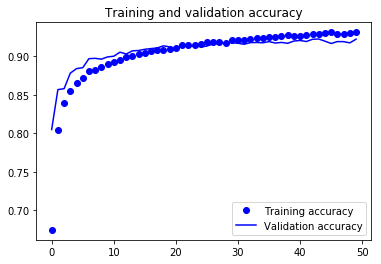

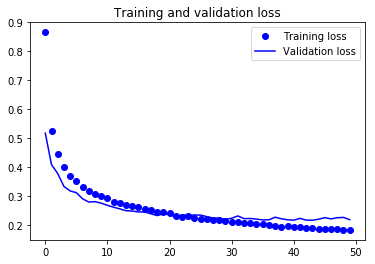

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### The network starts to overfit after about 20 epochs. Let's train a new network for 20 epochs and see how it performs.

## Convnet take II

In [19]:
# same code as above
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [20]:
# change epochs to 20, keep the rest the same as above
history = model.fit(X_train, y_train,
          batch_size=256,
          epochs=20,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 45s 943us/step - loss: 0.8473 - acc: 0.6797 - val_loss: 0.5214 - val_acc: 0.8057
Epoch 2/20
48000/48000 [==============================] - 45s 927us/step - loss: 0.5319 - acc: 0.8003 - val_loss: 0.4314 - val_acc: 0.8391
Epoch 3/20
48000/48000 [==============================] - 44s 922us/step - loss: 0.4569 - acc: 0.8321 - val_loss: 0.3910 - val_acc: 0.8591
Epoch 4/20
48000/48000 [==============================] - 44s 925us/step - loss: 0.4147 - acc: 0.8484 - val_loss: 0.3464 - val_acc: 0.8743
Epoch 5/20
48000/48000 [==============================] - 45s 941us/step - loss: 0.3790 - acc: 0.8628 - val_loss: 0.3238 - val_acc: 0.8808
Epoch 6/20
48000/48000 [==============================] - 44s 924us/step - loss: 0.3555 - acc: 0.8700 - val_loss: 0.3101 - val_acc: 0.8872
Epoch 7/20
48000/48000 [==============================] - 44s 925us/step - loss: 0.3429 - acc: 0.8762 - val_loss: 0.

In [21]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.22374543445706369
Test accuracy: 0.9149


# Results:

Compared to the first convnet, this one has slightly higher test loss and slightly lower accuracy. The accuracy is on par with the exhisting SVM classifier baseline of 0.91.

### Plot training and validation accuracy and loss

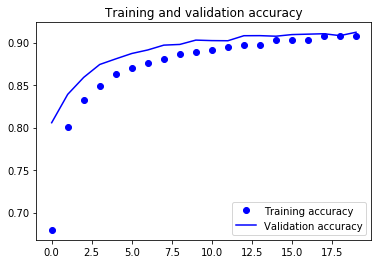

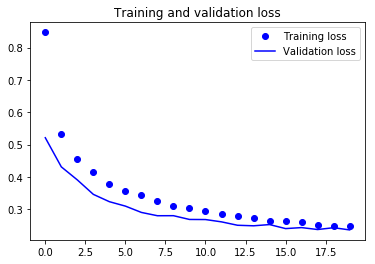

In [22]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Indeed, we can see that the network doesn't start to overfit with 20 layers.

In [ ]:
# try more adjustements and test for improvement

### Make predictions with test data

In [17]:
predicted_classes = model.predict_classes(X_test)

### Classification report

In [ ]:
# get the indices to be plotted
y_true = test_data.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [18]:
# create dictionary with label numbers as keys, label names as values
label_names = { 0:"T-shirt/top", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat", 5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle boot" }

In [19]:
from sklearn.metrics import classification_report
target_names = ["{}".format(label_names[i]) for i in range(10)] # 10 being the number of classes
print(classification_report(y_true, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

T-shirt/top       0.85      0.90      0.88      1000
    Trouser       0.99      0.99      0.99      1000
   Pullover       0.91      0.85      0.88      1000
      Dress       0.93      0.94      0.94      1000
       Coat       0.85      0.90      0.87      1000
     Sandal       0.99      0.98      0.98      1000
      Shirt       0.80      0.75      0.78      1000
    Sneaker       0.96      0.97      0.97      1000
        Bag       0.99      0.98      0.98      1000
 Ankle boot       0.97      0.97      0.97      1000

avg / total       0.92      0.92      0.92     10000



### Pickle model

In [23]:
# still to do

## Let's see what the neural net is really up to!
#### First, we'll look at examples of images it predicted correctly and incorrectly, and then we'll check out the activations of each layer to see what they're actually doing.

### Examples of correctly predicted images:

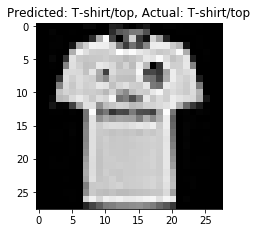

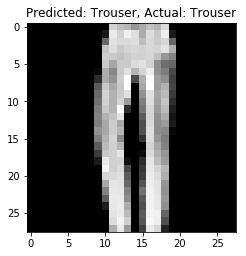

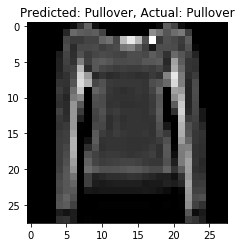

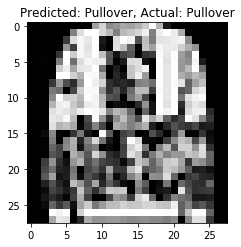

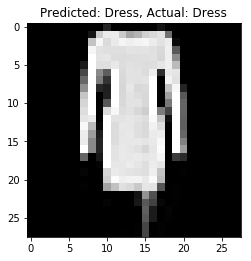

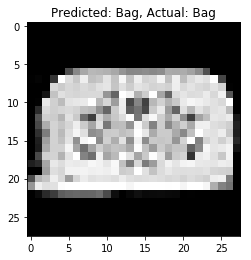

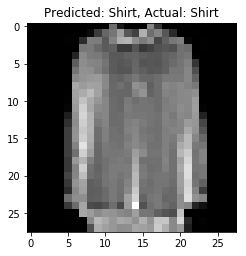

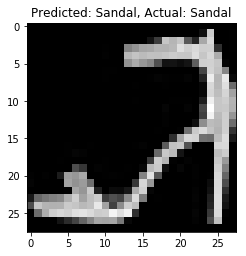

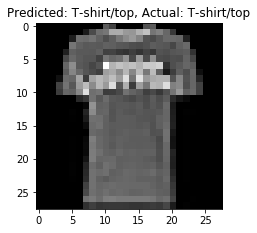

In [20]:
for i, correct_img in enumerate(correct[:9]):
    plt.figure(figsize=(10,10))
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct_img].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted: {}, Actual: {}".format(label_names[predicted_classes[correct_img]], label_names[y_true[correct_img]]))
    plt.tight_layout()

### Examples of incorrectly predicted images:

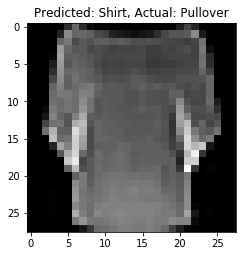

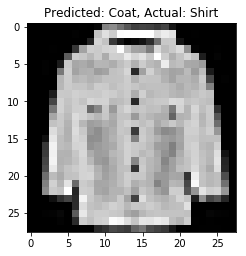

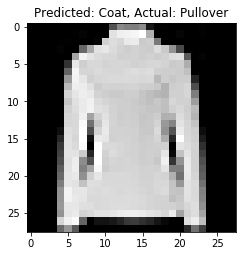

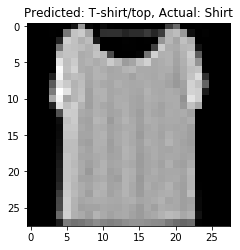

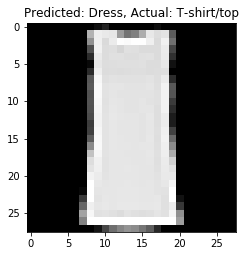

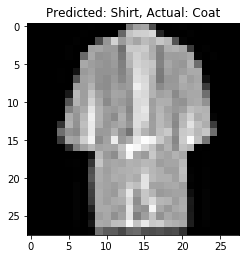

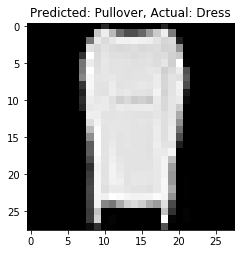

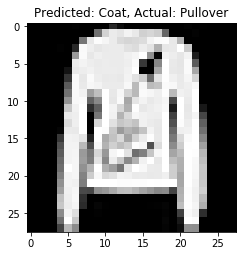

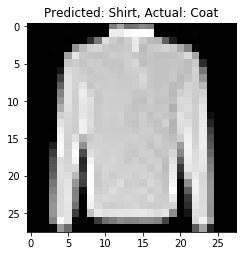

In [21]:
for i, incorrect_img in enumerate(incorrect[0:9]):
    plt.figure(figsize=(10,10))
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect_img].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted: {}, Actual: {}".format(label_names[predicted_classes[incorrect_img]], label_names[y_true[incorrect_img]]))
    plt.tight_layout()

### Visualizing intermediate activations

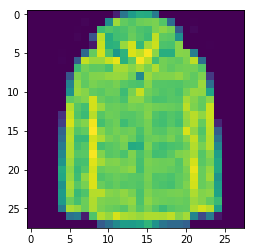

In [22]:
# select and visualize a single image
img = X_train[99]
plt.imshow(img.reshape(28,28), cmap='viridis', interpolation='none')
plt.show()

#### Visualizing the 2nd channel of the first layer

/Users/katrinasperry/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=[<tf.Tenso...)`
  This is separate from the ipykernel package so we can avoid doing imports until


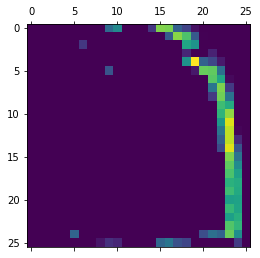

In [23]:
# instantiate a model from an input tensor and a list of output tensors
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(input=model.input, output=layer_outputs)

# reshape img into 4 dimensional tensor
activations = activation_model.predict(img.reshape(1,28,28,1))

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

#### Visualizing every channel in the intermediate activations

/Users/katrinasperry/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


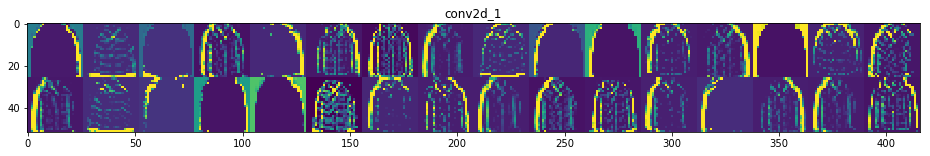

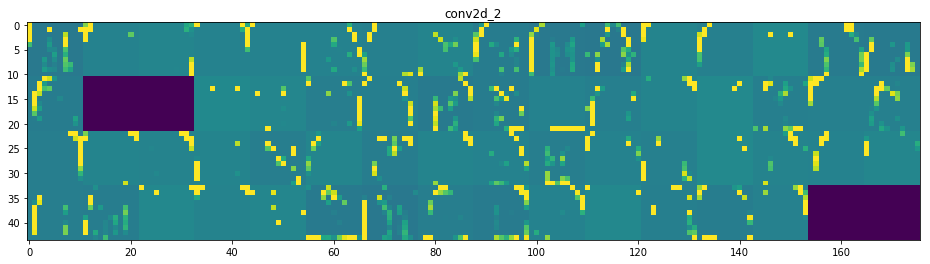

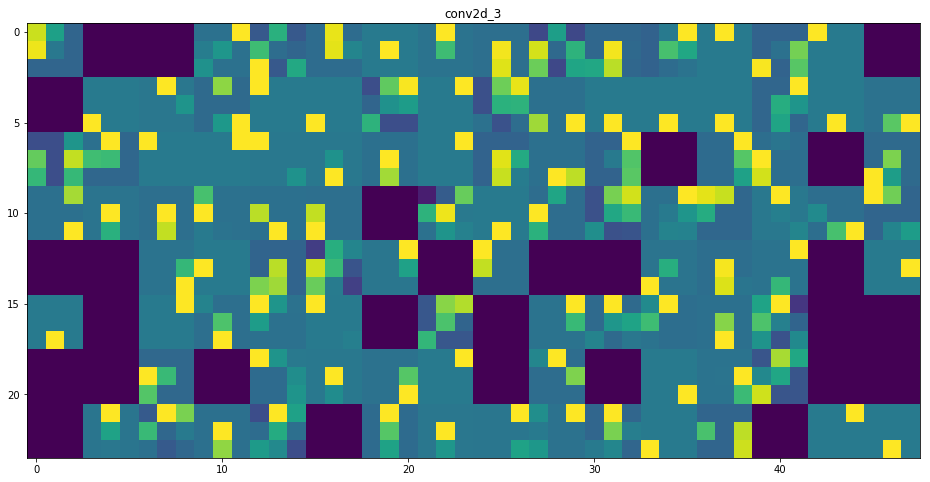

In [24]:
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name) 

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')